In [67]:
#Hierarchical clustering analysis of feature weights to determine whether specific subjects 
#are more generablizable to one another and whether this influenced between person performance
#all packages and dataframes
import numpy as np
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import colors as mcolors
from matplotlib.lines import Line2D
import matplotlib.patches as patches
%matplotlib inline 
feature=[14808,10824,8736, 4620,5264,3151, 484, 4060, 2375,316, 564,45,21]
netRoi=dict([('unassign',14808),('default', 10824),('visual',8736),('fp', 4620),('dan',5264),('van',3151),('salience', 484),('co', 4060),('sm', 2375),('sm-lat', 316),('auditory', 564),('pmn',45),('pon',21)])
thisDir = os.path.expanduser('~/Desktop/Porteretal_taskprediction/output/results/')
homeDir = os.path.expanduser('~/Desktop/Porteretal_taskprediction/')
figsDir = os.path.expanduser('~/Desktop/Porteretal_taskprediction/output/figures/')

subList=['MSC01','MSC02','MSC03','MSC04','MSC05','MSC06','MSC07','MSC10']
sem = pd.DataFrame()
for i in subList:
    tmp = pd.read_csv(thisDir+'Ridge/single_task/fw/'+i+'_semantic.csv', header= None)
    tmp.rename(index = {0:i},inplace=True)
    sem=sem.append(tmp)
    
    
mem = pd.DataFrame()
for i in subList:
    tmp = pd.read_csv(thisDir+'Ridge/single_task/fw/'+i+'_mem.csv', header= None)
    tmp.rename(index = {0:i},inplace=True)
    mem=mem.append(tmp)

mot = pd.DataFrame()
for i in subList:
    tmp = pd.read_csv(thisDir+'Ridge/single_task/fw/'+i+'_motor.csv', header= None)
    tmp.rename(index = {0:i},inplace=True)
    mot=mot.append(tmp)
    

    
glass = pd.DataFrame()
for i in subList:
    tmp = pd.read_csv(thisDir+'Ridge/single_task/fw/'+i+'_glass.csv', header= None)
    tmp.rename(index = {0:i},inplace=True)
    glass=glass.append(tmp)
    
    
    
all_task = pd.DataFrame()
for i in subList:
    tmp = pd.read_csv(thisDir+'Ridge/ALL_Binary/fw/'+i+'.csv', header= None)
    tmp.rename(index = {0:i},inplace=True)
    all_task=all_task.append(tmp)

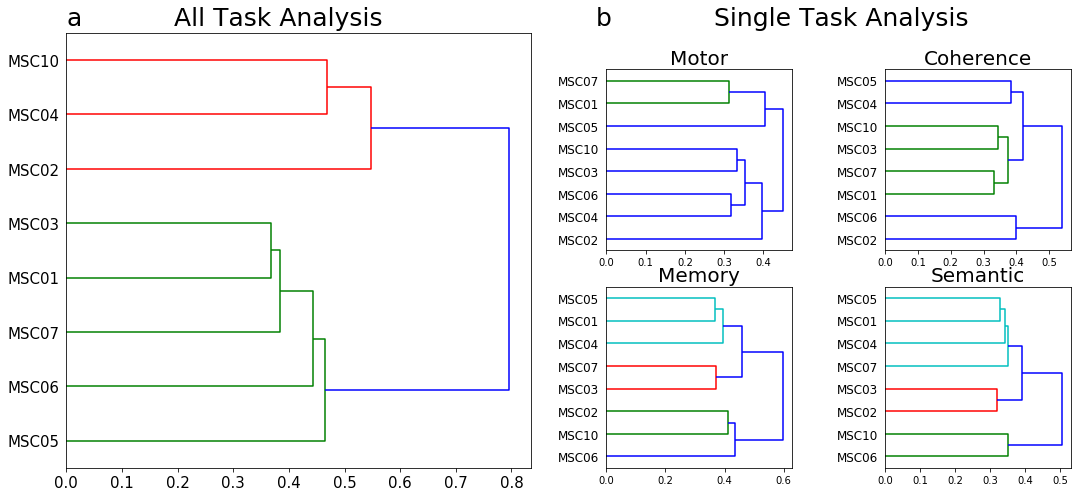

In [81]:
fig = plt.figure(figsize=(15,8),constrained_layout=False)
gs00 = fig.add_gridspec(nrows=2, ncols=1, left=0.05, right=0.48,
                        wspace=0.05)

gs01 = fig.add_gridspec(nrows=3, ncols=2, left=0.55, right=0.98,height_ratios=[.001,1,1], hspace=.3, wspace=.5)
fig.text(.05, .893, 'a',fontsize=25)
fig.text(.54, .893, 'b',fontsize=25)
fig.text(.15, .893, 'All Task Analysis',fontsize=25)
fig.text(.65, .893, 'Single Task Analysis',fontsize=25)

ax0=fig.add_subplot(gs00[0:,0])
Z = shc.linkage(all_task, 'ward')
shc.dendrogram(Z, orientation="right", labels=all_task.index, ax = ax0)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

#motor
ax1=fig.add_subplot(gs01[1,0])
Z = shc.linkage(mot, 'ward')
# Orientation of the dendrogram
shc.dendrogram(Z, orientation="right", labels=mot.index, ax = ax1)
plt.title('Motor', fontsize=20, pad=5)

#coherence
ax2=fig.add_subplot(gs01[1,1])
Z = shc.linkage(glass, 'ward')
# Orientation of the dendrogram
shc.dendrogram(Z, orientation="right", labels=glass.index, ax = ax2)
plt.title('Coherence', fontsize=20, pad=5)

#memory
ax3=fig.add_subplot(gs01[2,0])
Z = shc.linkage(mem, 'ward')
# Orientation of the dendrogram
shc.dendrogram(Z, orientation="right", labels=mem.index, ax = ax3)
plt.title('Memory', fontsize=20, pad=5)

#semantic
ax4=fig.add_subplot(gs01[2,1],sharey=ax3)
Z = shc.linkage(sem, 'ward')
# Orientation of the dendrogram
shc.dendrogram(Z, orientation="right", labels=sem.index, ax = ax4)
plt.title('Semantic', fontsize=20, pad=5)


plt.savefig(figsDir+'hierarch_clust.png', bbox_inches='tight')

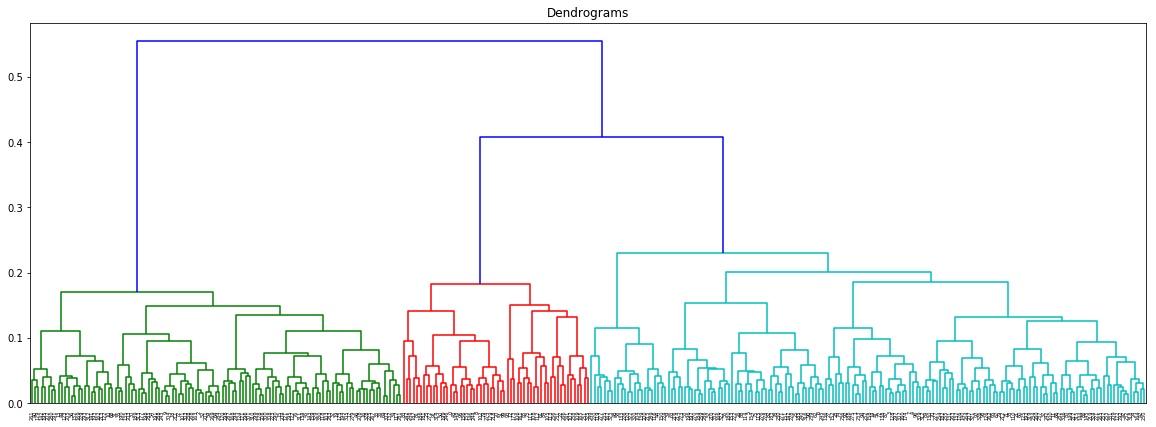

In [28]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(20, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(sem, method='ward'))

In [11]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(sem)

array([1, 0, 2, 0, 0, 0, 0, 0, 1, 2, 2, 0, 1, 2, 0, 2, 2, 2, 2, 2, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 1,
       0, 2, 2, 0, 0, 2, 1, 1, 2, 0, 2, 0, 2, 0, 2, 2, 2, 1, 0, 0, 2, 0,
       0, 0, 2, 2, 0, 0, 2, 1, 1, 0, 2, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0,
       2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 2, 2, 0, 1, 0, 0, 2, 2, 2, 2, 0, 1, 0, 2,
       0, 2, 2, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 1, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1,
       0, 2, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0,
       0, 0, 1, 2, 2, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2,
       0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2,

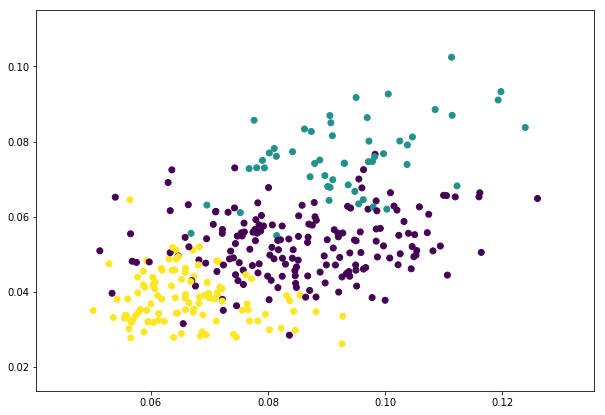

In [12]:
plt.figure(figsize=(10, 7))  
plt.scatter(sem['MSC02'], sem['groupwise'], c=cluster.labels_) 

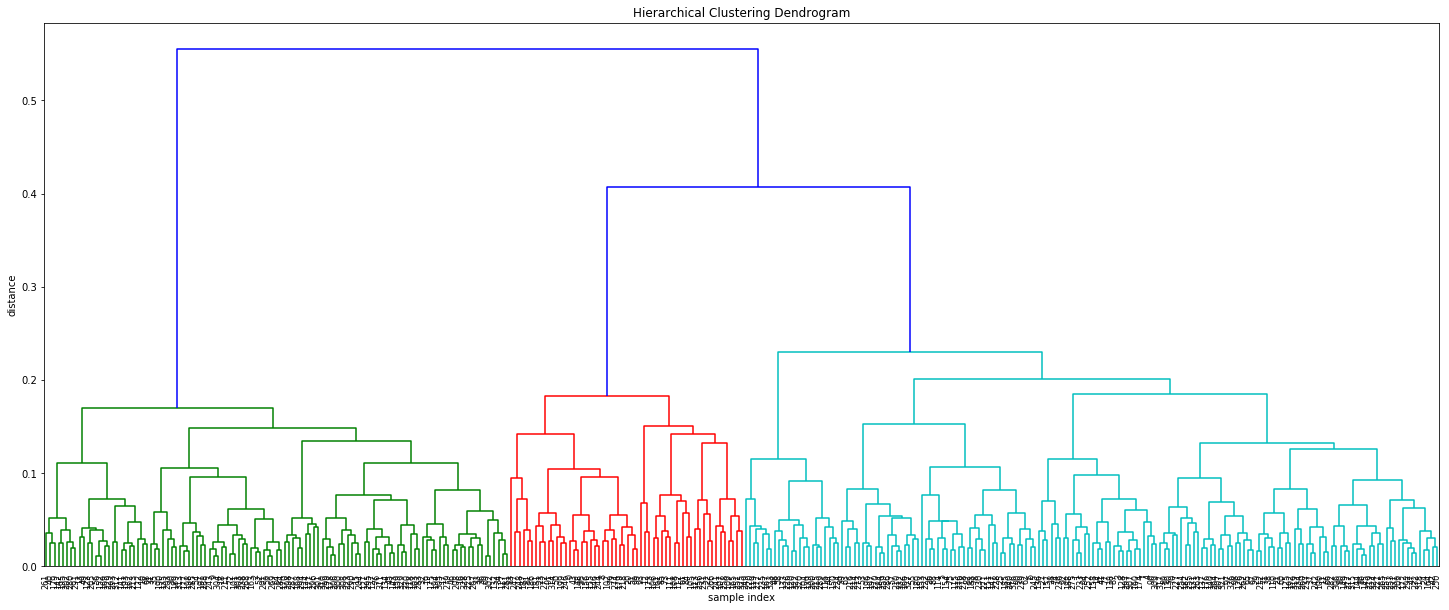

In [29]:
# generate the linkage matrix
Z = shc.linkage(sem, 'ward')
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
shc.dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

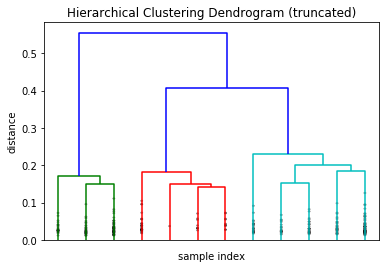

In [30]:

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
shc.dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

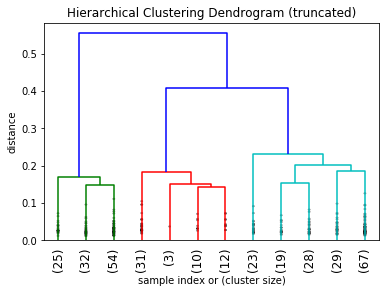

In [31]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
shc.dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

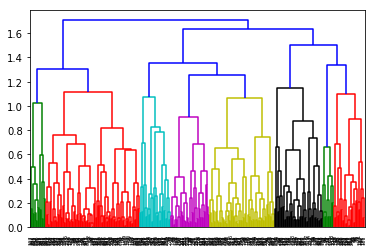

In [25]:
from scipy.spatial.distance import pdist, squareform
c_dist = pdist(sem) # computing the distance
c_link = shc.linkage(sem,  metric='correlation', method='complete')# computing the linkage
B=shc.dendrogram(c_link)#,labels=list(sem.columns))

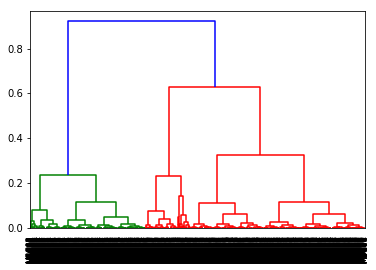

In [45]:
Z = shc.linkage(new_sem, 'ward')
 
# Plot with Custom leaves
shc.dendrogram(Z, leaf_rotation=90, leaf_font_size=8, labels=new_sem.index)

# Show the graph
plt.show()

{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [55.0, 55.0, 65.0, 65.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [215.0, 215.0, 225.0, 225.0],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [265.0, 265.0, 275.0, 275.0],
  [285.0, 285.0, 295.0, 295.0],
  [375.0, 375.0, 385.0, 385.0],
  [395.0, 395.0, 405.0, 405.0],
  [425.0, 425.0, 435.0, 435.0],
  [415.0, 415.0, 430.0, 430.0],
  [445.0, 445.0, 455.0, 455.0],
  [485.0, 485.0, 495.0, 495.0],
  [475.0, 475.0, 490.0, 490.0],
  [565.0, 565.0, 575.0, 575.0],
  [555.0, 555.0, 570.0, 570.0],
  [545.0, 545.0, 562.5, 562.5],
  [585.0, 585.0, 595.0, 595.0],
  [605.0, 605.0, 615.0, 615.0],
  [685.0, 685.0, 695.0, 695.0],
  [705.0, 705.0, 715.0, 715.0],
  [805.0, 805.0, 815.0, 815.0],
  [795.0, 795.0, 810.0, 810.0],
  [825.0, 825.0, 835.0, 835.0],
  [865.0, 865.0, 875.0, 875.0],
  [855.0, 855.0, 870.0, 870.0],
  [845.0, 845.0, 862.5, 862.5],
  [830.0, 830.0, 853.75, 853.75],
  [802.5, 802.5,

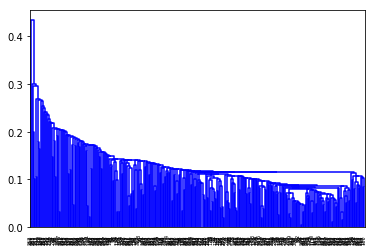

In [46]:
Y=pdist(sem, 'correlation')
Z=shc.linkage(sem, 'single', 'correlation')
shc.dendrogram(Z, color_threshold=0)

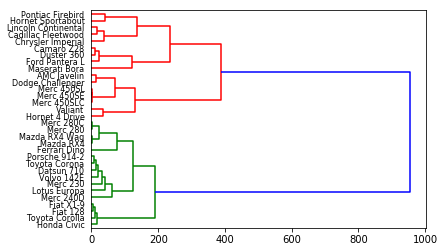

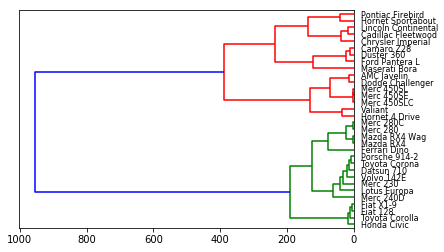

In [53]:
# Libraries
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster import hierarchy
import numpy as np
 
# Data set
url = '~/Desktop/mtcars.csv'
df = pd.read_csv(url)
df.rename(columns = {'Unnamed: 0':'model'},inplace=True)
df = df.set_index('model')
 
# Calculate the distance between each sample
Z = hierarchy.linkage(df, 'ward')
 
# Orientation of the dendrogram
hierarchy.dendrogram(Z, orientation="right", labels=df.index)
plt.show()
# or
hierarchy.dendrogram(Z, orientation="left", labels=df.index)
plt.show()

In [55]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


,value
variable,
MSC01,0.070593
MSC01,0.083117
MSC01,0.046986
MSC01,0.072751
MSC01,0.110121
...,...
MSC10,0.074029
MSC10,0.083060
MSC10,0.074695
